In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [2]:
pd.set_option("display.max_columns",None)

In [3]:
df=pd.read_csv("df_cleaned.csv")
df.head()

,Unnamed: 0,FlightNum,TailNum,Airline,UniqueCarrier,Origin,Dest,Distance,CRSDepTime,DepTime,DepDelay,CRSArrTime,ArrTime,ArrDelay,CRSElapsedTime,ActualElapsedTime,AirTime,Temp_avg,Dew_avg,Hum_avg,Wind_avg,Pres_avg,Precipitation,Date_day,Date_weekday,Date_month,Date_week,Date_quarter,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,3920,N464WN,Southwest Airlines Co.,WN,IND,BWI,515,1755,1829,34,1925,1959,34,90,90,77,32.3,30.0,91.5,9.6,30.1,0.23,5,4,3,9,1,2,0,0,0,32
1,1,509,N763SW,Southwest Airlines Co.,WN,IND,LAS,1591,1830,1937,67,1940,2037,57,250,240,230,64.8,30.8,29.4,9.5,27.6,0.00,5,4,3,9,1,10,0,0,0,47
2,2,1333,N334SW,Southwest Airlines Co.,WN,IND,MCO,828,1510,1644,94,1725,1845,80,135,121,107,71.2,61.4,73.4,5.2,30.0,0.00,5,4,3,9,1,8,0,0,0,72
3,3,675,N286WN,Southwest Airlines Co.,WN,IND,PHX,1489,1425,1452,27,1625,1640,15,240,228,213,66.4,46.0,49.5,6.1,28.8,0.00,5,4,3,9,1,3,0,0,0,12
4,4,4,N674AA,Southwest Airlines Co.,WN,IND,TPA,838,1255,1323,28,1510,1526,16,135,123,110,71.3,62.8,75.5,4.6,30.1,0.00,5,4,3,9,1,0,0,0,0,16


In [4]:
df.shape

(437902, 33)

In [5]:
df.dtypes

Unnamed: 0             int64
FlightNum              int64
TailNum               object
Airline               object
UniqueCarrier         object
Origin                object
Dest                  object
Distance               int64
CRSDepTime             int64
DepTime                int64
DepDelay               int64
CRSArrTime             int64
ArrTime                int64
ArrDelay               int64
CRSElapsedTime         int64
ActualElapsedTime      int64
AirTime                int64
Temp_avg             float64
Dew_avg              float64
Hum_avg              float64
Wind_avg             float64
Pres_avg             float64
Precipitation        float64
Date_day               int64
Date_weekday           int64
Date_month             int64
Date_week              int64
Date_quarter           int64
CarrierDelay           int64
WeatherDelay           int64
NASDelay               int64
SecurityDelay          int64
LateAircraftDelay      int64
dtype: object

In [6]:
df[df['WeatherDelay'] > 0]

,Unnamed: 0,FlightNum,TailNum,Airline,UniqueCarrier,Origin,Dest,Distance,CRSDepTime,DepTime,DepDelay,CRSArrTime,ArrTime,ArrDelay,CRSElapsedTime,ActualElapsedTime,AirTime,Temp_avg,Dew_avg,Hum_avg,Wind_avg,Pres_avg,Precipitation,Date_day,Date_weekday,Date_month,Date_week,Date_quarter,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
190,210,646,N738CB,Southwest Airlines Co.,WN,LAX,SFO,337,1805,2008,123,1930,2139,129,85,91,70,50.1,41.5,72.5,3.2,30.0,0.00,5,4,3,9,1,0,24,6,0,99
198,218,1113,N731SA,Southwest Airlines Co.,WN,LAX,SJC,308,2035,2140,65,2140,2249,69,65,69,54,51.5,43.6,75.3,1.9,30.0,0.00,5,4,3,9,1,0,12,4,0,53
314,346,950,N750SA,Southwest Airlines Co.,WN,MDW,CMH,284,615,637,22,815,838,23,60,61,49,33.9,25.2,71.1,7.3,29.2,0.15,5,4,3,9,1,0,22,1,0,0
325,367,3760,N672SW,Southwest Airlines Co.,WN,MDW,IAD,577,640,647,7,915,931,16,95,104,84,33.4,28.8,83.5,6.5,29.9,0.17,5,4,3,9,1,0,7,9,0,0
336,378,891,N400WN,Southwest Airlines Co.,WN,MDW,LAS,1521,615,650,35,815,840,25,240,230,216,64.8,30.8,29.4,9.5,27.6,0.00,5,4,3,9,1,0,25,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437866,492533,1487,N423AA,American Airlines Inc.,AA,STL,DFW,551,1755,1847,52,1945,2031,46,110,104,84,77.0,54.3,48.4,6.5,23.3,0.00,4,3,6,24,2,0,46,0,0,0
437870,492537,1487,N4WKAA,American Airlines Inc.,AA,STL,DFW,551,1755,1844,49,1945,2137,112,110,173,103,83.3,68.5,62.7,8.8,29.4,0.00,5,4,6,26,2,0,49,63,0,0
437883,492559,1492,N3CBAA,American Airlines Inc.,AA,MSY,MIA,674,1300,1337,37,1555,1624,29,115,107,93,83.7,73.3,71.1,4.7,30.1,0.78,7,6,6,26,2,0,3,0,0,26
437887,492563,1494,N547AA,American Airlines Inc.,AA,DFW,FLL,1119,1245,1424,99,1640,1854,134,175,210,158,77.5,73.2,86.6,10.1,30.0,1.12,1,0,6,25,2,0,79,35,0,20


In [7]:
df_2=pd.read_csv("df_cleaned.csv")

## Seperating Hours and Minutes for hh:mm columns

##### CRSDepTime

In [8]:
#TO CHANGE THE MISSING DIGIT ------ DepTime - 958 to 0958
df_2['CRSDepTime'] = df_2.CRSDepTime.map("{:04}".format)

In [9]:
#ADDING COLON AFTER TWO CHARACHTER -----DepTime  - 09:58
df_2['CRSDepTime'] =df_2['CRSDepTime'].astype(str).replace(r"(\d{2})(\d+)", r"\1:\2", regex=True)

In [10]:
#changing 24:00 to 00:00
#because while changing to Standard Timestamp, we will get error if the column have 24:00 value)
df_2['CRSDepTime'] = df_2.CRSDepTime.replace(to_replace ='24:', value = '00:', regex = True)

In [11]:
df_2['CRSDepTime_hours']= df_2['CRSDepTime'].apply(lambda x: x[0:2])

In [12]:
df_2['CRSDepTime_minutes']=df_2['CRSDepTime'].apply(lambda x: x[3:])

In [13]:
df_2['CRSDepTime_hours'].astype(int)
df_2['CRSDepTime_minutes'].astype(int)

0         55
1         30
2         10
3         25
4         55
          ..
437897    35
437898    35
437899    35
437900    35
437901    35
Name: CRSDepTime_minutes, Length: 437902, dtype: int32

##### DepTime

In [14]:
#TO CHANGE THE MISSING DIGIT ------ DepTime - 958 to 0958
df_2['DepTime'] = df_2.DepTime.map("{:04}".format)

In [15]:
#ADDING COLON AFTER TWO CHARACHTER -----DepTime  - 09:58
df_2['DepTime'] =df_2['DepTime'].astype(str).replace(r"(\d{2})(\d+)", r"\1:\2", regex=True)

In [16]:
#changing 24:00 to 00:00
#because while changing to Standard Timestamp, we will get error if the column have 24:00 value)
df_2['DepTime'] = df_2.DepTime.replace(to_replace ='24:', value = '00:', regex = True)

In [17]:
df_2['DepTime_hours']= df_2['DepTime'].apply(lambda x: x[0:2])

In [18]:
df_2['DepTime_minutes']=df_2['DepTime'].apply(lambda x: x[3:])

In [19]:
df_2['DepTime_hours'].astype(int)
df_2['DepTime_minutes'].astype(int)

0         29
1         37
2         44
3         52
4         23
          ..
437897     9
437898    16
437899    17
437900     7
437901     8
Name: DepTime_minutes, Length: 437902, dtype: int32

##### CRSArrTime

In [20]:
#TO CHANGE THE MISSING DIGIT ------ DepTime - 958 to 0958
df_2['CRSArrTime'] = df_2.CRSArrTime.map("{:04}".format)

In [21]:
#ADDING COLON AFTER TWO CHARACHTER -----DepTime  - 09:58
df_2['CRSArrTime'] =df_2['CRSArrTime'].astype(str).replace(r"(\d{2})(\d+)", r"\1:\2", regex=True)

In [22]:
#changing 24:00 to 00:00
#because while changing to Standard Timestamp, we will get error if the column have 24:00 value)
df_2['CRSArrTime'] = df_2.CRSArrTime.replace(to_replace ='24:', value = '00:', regex = True)

In [23]:
df_2['CRSArrTime_hours']= df_2['CRSArrTime'].apply(lambda x: x[0:2])

In [24]:
df_2['CRSArrTime_minutes']=df_2['CRSArrTime'].apply(lambda x: x[3:])

In [25]:
df_2['CRSArrTime_hours'].astype(int)
df_2['CRSArrTime_minutes'].astype(int)

0         25
1         40
2         25
3         25
4         10
          ..
437897    15
437898    15
437899    15
437900    15
437901    15
Name: CRSArrTime_minutes, Length: 437902, dtype: int32

##### ArrTime

In [26]:
#TO CHANGE THE MISSING DIGIT ------ DepTime - 958 to 0958
df_2['ArrTime'] = df_2.ArrTime.map("{:04}".format)

In [27]:
#ADDING COLON AFTER TWO CHARACHTER -----DepTime  - 09:58
df_2['ArrTime'] =df_2['ArrTime'].astype(str).replace(r"(\d{2})(\d+)", r"\1:\2", regex=True)

In [28]:
#changing 24:00 to 00:00
#because while changing to Standard Timestamp, we will get error if the column have 24:00 value)
df_2['ArrTime'] = df_2.ArrTime.replace(to_replace ='24:', value = '00:', regex = True)

In [29]:
df_2['ArrTime_hours']= df_2['ArrTime'].apply(lambda x: x[0:2])

In [30]:
df_2['ArrTime_minutes']=df_2['ArrTime'].apply(lambda x: x[3:])

In [31]:
df_2['ArrTime_hours'].astype(int)
df_2['ArrTime_minutes'].astype(int)

0         59
1         37
2         45
3         40
4         26
          ..
437897    42
437898    54
437899     2
437900    41
437901    33
Name: ArrTime_minutes, Length: 437902, dtype: int32

# Converting WeatherDelays into 1 and 0

In [32]:
#df_2['WeatherDelay']=df_2['WeatherDelay'].apply(lambda x: 1 if x != 0 else 0 )

In [34]:
df_2.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [35]:
df_2.head()

,FlightNum,TailNum,Airline,UniqueCarrier,Origin,Dest,Distance,CRSDepTime,DepTime,DepDelay,CRSArrTime,ArrTime,ArrDelay,CRSElapsedTime,ActualElapsedTime,AirTime,Temp_avg,Dew_avg,Hum_avg,Wind_avg,Pres_avg,Precipitation,Date_day,Date_weekday,Date_month,Date_week,Date_quarter,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,CRSDepTime_hours,CRSDepTime_minutes,DepTime_hours,DepTime_minutes,CRSArrTime_hours,CRSArrTime_minutes,ArrTime_hours,ArrTime_minutes
0,3920,N464WN,Southwest Airlines Co.,WN,IND,BWI,515,17:55,18:29,34,19:25,19:59,34,90,90,77,32.3,30.0,91.5,9.6,30.1,0.23,5,4,3,9,1,2,0,0,0,32,17,55,18,29,19,25,19,59
1,509,N763SW,Southwest Airlines Co.,WN,IND,LAS,1591,18:30,19:37,67,19:40,20:37,57,250,240,230,64.8,30.8,29.4,9.5,27.6,0.00,5,4,3,9,1,10,0,0,0,47,18,30,19,37,19,40,20,37
2,1333,N334SW,Southwest Airlines Co.,WN,IND,MCO,828,15:10,16:44,94,17:25,18:45,80,135,121,107,71.2,61.4,73.4,5.2,30.0,0.00,5,4,3,9,1,8,0,0,0,72,15,10,16,44,17,25,18,45
3,675,N286WN,Southwest Airlines Co.,WN,IND,PHX,1489,14:25,14:52,27,16:25,16:40,15,240,228,213,66.4,46.0,49.5,6.1,28.8,0.00,5,4,3,9,1,3,0,0,0,12,14,25,14,52,16,25,16,40
4,4,N674AA,Southwest Airlines Co.,WN,IND,TPA,838,12:55,13:23,28,15:10,15:26,16,135,123,110,71.3,62.8,75.5,4.6,30.1,0.00,5,4,3,9,1,0,0,0,0,16,12,55,13,23,15,10,15,26


### Predicting Multi-Categories

In [36]:
mdelay=[]
for ind in df_2.index:
    li=[]
    
    li=[df_2['CarrierDelay'][ind] , df_2['WeatherDelay'][ind] , df_2['NASDelay'][ind] , \
        df_2['SecurityDelay'][ind] , df_2['LateAircraftDelay'][ind]]
    m=max(li)
    
    mdelay.append(m)
    
df_2['MaxDelay']=mdelay

   
df_2.head(50)

,FlightNum,TailNum,Airline,UniqueCarrier,Origin,Dest,Distance,CRSDepTime,DepTime,DepDelay,CRSArrTime,ArrTime,ArrDelay,CRSElapsedTime,ActualElapsedTime,AirTime,Temp_avg,Dew_avg,Hum_avg,Wind_avg,Pres_avg,Precipitation,Date_day,Date_weekday,Date_month,Date_week,Date_quarter,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,CRSDepTime_hours,CRSDepTime_minutes,DepTime_hours,DepTime_minutes,CRSArrTime_hours,CRSArrTime_minutes,ArrTime_hours,ArrTime_minutes,MaxDelay
0,3920,N464WN,Southwest Airlines Co.,WN,IND,BWI,515,17:55,18:29,34,19:25,19:59,34,90,90,77,32.3,30.0,91.5,9.6,30.1,0.23,5,4,3,9,1,2,0,0,0,32,17,55,18,29,19,25,19,59,32
1,509,N763SW,Southwest Airlines Co.,WN,IND,LAS,1591,18:30,19:37,67,19:40,20:37,57,250,240,230,64.8,30.8,29.4,9.5,27.6,0.00,5,4,3,9,1,10,0,0,0,47,18,30,19,37,19,40,20,37,47
2,1333,N334SW,Southwest Airlines Co.,WN,IND,MCO,828,15:10,16:44,94,17:25,18:45,80,135,121,107,71.2,61.4,73.4,5.2,30.0,0.00,5,4,3,9,1,8,0,0,0,72,15,10,16,44,17,25,18,45,72
3,675,N286WN,Southwest Airlines Co.,WN,IND,PHX,1489,14:25,14:52,27,16:25,16:40,15,240,228,213,66.4,46.0,49.5,6.1,28.8,0.00,5,4,3,9,1,3,0,0,0,12,14,25,14,52,16,25,16,40,12
4,4,N674AA,Southwest Airlines Co.,WN,IND,TPA,838,12:55,13:23,28,15:10,15:26,16,135,123,110,71.3,62.8,75.5,4.6,30.1,0.00,5,4,3,9,1,0,0,0,0,16,12,55,13,23,15,10,15,26,16
5,54,N643SW,Southwest Airlines Co.,WN,ISP,BWI,220,13:25,14:16,51,14:35,15:12,37,70,56,49,32.3,30.0,91.5,9.6,30.1,0.23,5,4,3,9,1,12,0,0,0,25,13,25,14,16,14,35,15,12,25
6,623,N724SW,Southwest Airlines Co.,WN,ISP,BWI,220,16:25,16:57,32,17:35,17:54,19,70,57,47,32.3,30.0,91.5,9.6,30.1,0.23,5,4,3,9,1,7,0,0,0,12,16,25,16,57,17,35,17,54,12
7,188,N215WN,Southwest Airlines Co.,WN,ISP,FLL,1093,12:55,14:22,87,16:10,16:57,47,195,155,143,74.9,65.1,72.4,6.3,30.1,0.00,5,4,3,9,1,40,0,0,0,7,12,55,14,22,16,10,16,57,40
8,362,N798SW,Southwest Airlines Co.,WN,ISP,MCO,972,19:45,21:07,82,22:30,23:34,64,165,147,134,71.2,61.4,73.4,5.2,30.0,0.00,5,4,3,9,1,5,0,0,0,59,19,45,21,07,22,30,23,34,59
9,422,N779SW,Southwest Airlines Co.,WN,ISP,MDW,765,16:50,18:12,82,18:15,19:27,72,145,135,118,30.3,21.1,68.5,5.7,29.5,0.00,5,4,3,9,1,3,0,0,0,69,16,50,18,12,18,15,19,27,69


In [37]:
df_2.iloc[58872,:]

FlightNum                                     4411
TailNum                                     N922AE
Airline               American Eagle Airlines Inc.
UniqueCarrier                                   MQ
Origin                                         ORD
Dest                                           LEX
Distance                                       323
CRSDepTime                                   20:10
DepTime                                      20:24
DepDelay                                        14
CRSArrTime                                   22:25
ArrTime                                      22:40
ArrDelay                                        15
CRSElapsedTime                                  75
ActualElapsedTime                               76
AirTime                                         55
Temp_avg                                      74.7
Dew_avg                                       66.1
Hum_avg                                       76.7
Wind_avg                       

In [38]:
df_2['LateAircraftDelay']=np.where(df_2['LateAircraftDelay'] == df_2['MaxDelay'], 'LateAircraftDelay',0)
df_2['SecurityDelay']=np.where(df_2['SecurityDelay'] == df_2['MaxDelay'], 'SecurityDelay',0)
df_2['NASDelay']=np.where(df_2['NASDelay'] == df_2['MaxDelay'], 'NASDelay',0)
df_2['WeatherDelay']=np.where(df_2['WeatherDelay'] == df_2['MaxDelay'], 'WeatherDelay',0)
df_2['CarrierDelay']=np.where(df_2['CarrierDelay'] == df_2['MaxDelay'], 'CarrierDelay',0)

In [39]:
# Add columns together to a new column 
df_2['DelayType'] = df_2['CarrierDelay'] + df_2['WeatherDelay'] + df_2['NASDelay'] + df_2['SecurityDelay'] + df_2['LateAircraftDelay']


In [40]:
# Remove 0's from the new column
df_2['DelayType'] = df_2['DelayType'].str.replace('0', '')

In [41]:
df_2.head(5)

,FlightNum,TailNum,Airline,UniqueCarrier,Origin,Dest,Distance,CRSDepTime,DepTime,DepDelay,CRSArrTime,ArrTime,ArrDelay,CRSElapsedTime,ActualElapsedTime,AirTime,Temp_avg,Dew_avg,Hum_avg,Wind_avg,Pres_avg,Precipitation,Date_day,Date_weekday,Date_month,Date_week,Date_quarter,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,CRSDepTime_hours,CRSDepTime_minutes,DepTime_hours,DepTime_minutes,CRSArrTime_hours,CRSArrTime_minutes,ArrTime_hours,ArrTime_minutes,MaxDelay,DelayType
0,3920,N464WN,Southwest Airlines Co.,WN,IND,BWI,515,17:55,18:29,34,19:25,19:59,34,90,90,77,32.3,30.0,91.5,9.6,30.1,0.23,5,4,3,9,1,0,0,0,0,LateAircraftDelay,17,55,18,29,19,25,19,59,32,LateAircraftDelay
1,509,N763SW,Southwest Airlines Co.,WN,IND,LAS,1591,18:30,19:37,67,19:40,20:37,57,250,240,230,64.8,30.8,29.4,9.5,27.6,0.00,5,4,3,9,1,0,0,0,0,LateAircraftDelay,18,30,19,37,19,40,20,37,47,LateAircraftDelay
2,1333,N334SW,Southwest Airlines Co.,WN,IND,MCO,828,15:10,16:44,94,17:25,18:45,80,135,121,107,71.2,61.4,73.4,5.2,30.0,0.00,5,4,3,9,1,0,0,0,0,LateAircraftDelay,15,10,16,44,17,25,18,45,72,LateAircraftDelay
3,675,N286WN,Southwest Airlines Co.,WN,IND,PHX,1489,14:25,14:52,27,16:25,16:40,15,240,228,213,66.4,46.0,49.5,6.1,28.8,0.00,5,4,3,9,1,0,0,0,0,LateAircraftDelay,14,25,14,52,16,25,16,40,12,LateAircraftDelay
4,4,N674AA,Southwest Airlines Co.,WN,IND,TPA,838,12:55,13:23,28,15:10,15:26,16,135,123,110,71.3,62.8,75.5,4.6,30.1,0.00,5,4,3,9,1,0,0,0,0,LateAircraftDelay,12,55,13,23,15,10,15,26,16,LateAircraftDelay


In [42]:
df_2['DelayType'] = df_2['DelayType'].str.replace('CarrierDelayNASDelay', 'CarrierDelay')
df_2['DelayType'] = df_2['DelayType'].str.replace('CarrierDelayLateAircraftDelay', 'CarrierDelay')
df_2['DelayType'] = df_2['DelayType'].str.replace('NASDelayLateAircraftDelay', 'NASDelay')
df_2['DelayType'] = df_2['DelayType'].str.replace('CarrierDelayNASDelayLateAircraftDelay', 'NASDelay')
df_2['DelayType'] = df_2['DelayType'].str.replace('WeatherDelayNASDelay', 'WeatherDelay')

df_2['DelayType'] = df_2['DelayType'].str.replace('WeatherDelayLateAircraftDelay', 'WeatherDelay')
df_2['DelayType'] = df_2['DelayType'].str.replace('NASDelaySecurityDelay', 'SecurityDelay')
df_2['DelayType'] = df_2['DelayType'].str.replace('SecurityDelayLateAircraftDelay', 'SecurityDelay')
df_2['DelayType'] = df_2['DelayType'].str.replace('CarrierDelayWeatherDelay', 'WeatherDelay')

df_2['DelayType'] = df_2['DelayType'].str.replace('NASDelaySecurityDelayLateAircraftDelay', 'SecurityDelay')
df_2['DelayType'] = df_2['DelayType'].str.replace('CarrierDelaySecurityDelay', 'SecurityDelay')
df_2['DelayType'] = df_2['DelayType'].str.replace('CarrierDelayWeatherDelayLateAircraftDelay', 'WeatherDelay')
df_2['DelayType'] = df_2['DelayType'].str.replace('WeatherDelayNASDelayLateAircraftDelay', 'WeatherDelay')





In [43]:
df_2['DelayType'].unique()

array(['LateAircraftDelay', 'CarrierDelay', 'NASDelay', 'SecurityDelay',
       'WeatherDelay'], dtype=object)

In [44]:
df_2['Origin']=df_2['Origin'].astype('category')
df_2['Dest']=df_2['Dest'].astype('category')
df_2['UniqueCarrier']=df_2['UniqueCarrier'].astype('category')
df_2['DelayType']=df_2['DelayType'].astype('category')

In [45]:
df_2.drop(['ArrTime_hours','ArrTime_minutes','CRSArrTime','CRSDepTime','TailNum','Airline','DepTime','ArrTime','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'],axis=1,inplace=True)


In [46]:
df_2.drop(['MaxDelay'],axis=1,inplace=True)

In [47]:
df_2.head()

,FlightNum,UniqueCarrier,Origin,Dest,Distance,DepDelay,ArrDelay,CRSElapsedTime,ActualElapsedTime,AirTime,Temp_avg,Dew_avg,Hum_avg,Wind_avg,Pres_avg,Precipitation,Date_day,Date_weekday,Date_month,Date_week,Date_quarter,CRSDepTime_hours,CRSDepTime_minutes,DepTime_hours,DepTime_minutes,CRSArrTime_hours,CRSArrTime_minutes,DelayType
0,3920,WN,IND,BWI,515,34,34,90,90,77,32.3,30.0,91.5,9.6,30.1,0.23,5,4,3,9,1,17,55,18,29,19,25,LateAircraftDelay
1,509,WN,IND,LAS,1591,67,57,250,240,230,64.8,30.8,29.4,9.5,27.6,0.00,5,4,3,9,1,18,30,19,37,19,40,LateAircraftDelay
2,1333,WN,IND,MCO,828,94,80,135,121,107,71.2,61.4,73.4,5.2,30.0,0.00,5,4,3,9,1,15,10,16,44,17,25,LateAircraftDelay
3,675,WN,IND,PHX,1489,27,15,240,228,213,66.4,46.0,49.5,6.1,28.8,0.00,5,4,3,9,1,14,25,14,52,16,25,LateAircraftDelay
4,4,WN,IND,TPA,838,28,16,135,123,110,71.3,62.8,75.5,4.6,30.1,0.00,5,4,3,9,1,12,55,13,23,15,10,LateAircraftDelay


In [48]:
df_2['CRSDepTime_hours']=df_2['CRSDepTime_hours'].astype('int')
df_2['CRSDepTime_minutes']=df_2['CRSDepTime_minutes'].astype('int')
df_2['DepTime_hours']=df_2['DepTime_hours'].astype('int')
df_2['DepTime_minutes']=df_2['DepTime_minutes'].astype('int')
df_2['CRSArrTime_hours']=df_2['CRSArrTime_hours'].astype('int')
df_2['CRSArrTime_minutes']=df_2['CRSArrTime_minutes'].astype('int')
#df_2['ArrTime_hours']=df_2['ArrTime_hours'].astype('int')
#df_2['ArrTime_minutes']=df_2['ArrTime_minutes'].astype('int')



In [49]:
df_2.dtypes

FlightNum                int64
UniqueCarrier         category
Origin                category
Dest                  category
Distance                 int64
DepDelay                 int64
ArrDelay                 int64
CRSElapsedTime           int64
ActualElapsedTime        int64
AirTime                  int64
Temp_avg               float64
Dew_avg                float64
Hum_avg                float64
Wind_avg               float64
Pres_avg               float64
Precipitation          float64
Date_day                 int64
Date_weekday             int64
Date_month               int64
Date_week                int64
Date_quarter             int64
CRSDepTime_hours         int32
CRSDepTime_minutes       int32
DepTime_hours            int32
DepTime_minutes          int32
CRSArrTime_hours         int32
CRSArrTime_minutes       int32
DelayType             category
dtype: object

In [50]:
from sklearn.model_selection import train_test_split

# To define the input and output feature
x = df_2.drop('DelayType',axis=1)
y = df_2.loc[:,'DelayType']
# train and test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

## LightGBM Predicting Model

In [51]:
import warnings
warnings.filterwarnings("ignore")
import lightgbm as lgb

model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],
          verbose=20,eval_metric='logloss')

[20]	training's multi_logloss: 0.790064	valid_0's multi_logloss: 0.808025
[40]	training's multi_logloss: 0.735654	valid_0's multi_logloss: 0.76747
[60]	training's multi_logloss: 0.707883	valid_0's multi_logloss: 0.75405
[80]	training's multi_logloss: 0.689696	valid_0's multi_logloss: 0.750943
[100]	training's multi_logloss: 0.675851	valid_0's multi_logloss: 0.745779


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [52]:
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

Training accuracy 0.7128
Testing accuracy 0.6927


In [53]:
y_pred=model.predict(x_test)

In [54]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision score:', precision_score(y_test, y_pred,average='micro'))
print('Recall score:', recall_score(y_test, y_pred,average='micro'))
#print('Accuracy score:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred,average='micro'))

Precision score: 0.6927298142663382
Recall score: 0.6927298142663382
F1 score: 0.6927298142663382


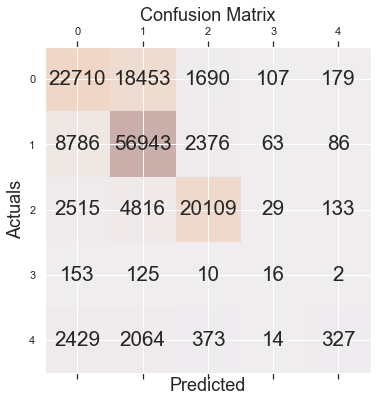

In [56]:
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [57]:
sum(y_test == 'LateAircraftDelay')

68254

In [58]:
sum(y_test == 'CarrierDelay')

43139

In [59]:
sum(y_test == 'NASDelay')

27602

In [60]:
sum(y_test == 'SecurityDelay')

306

In [61]:
sum(y_test == 'WeatherDelay')

5207

In [62]:
df_2['DelayType'].unique()

['LateAircraftDelay', 'CarrierDelay', 'NASDelay', 'SecurityDelay', 'WeatherDelay']
Categories (5, object): ['CarrierDelay', 'LateAircraftDelay', 'NASDelay', 'SecurityDelay', 'WeatherDelay']

In [63]:
conf_matrix.shape

(5, 5)

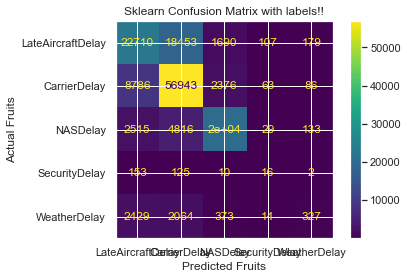

In [64]:
## alphabetical sorting order of the labels.

cm= confusion_matrix(y_test, y_pred)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['LateAircraftDelay', 'CarrierDelay', 'NASDelay', 'SecurityDelay', 'WeatherDelay'])
## The plot() function has to be called for the sklearn visualization
## code to do its work and the Axes object to be created.

cmd_obj.plot()
## Use the Axes attribute 'ax_' to get to the underlying Axes object.
## The Axes object controls the labels for the X and the Y axes. It
## also controls the title.
cmd_obj.ax_.set(
                title='Sklearn Confusion Matrix with labels!!', 
                xlabel='Predicted Fruits', 
                ylabel='Actual Fruits')
## Finally, call the matplotlib show() function to display the visualization
## of the Confusion Matrix.
plt.show()

In [65]:
np.unique(y_pred)

array(['CarrierDelay', 'LateAircraftDelay', 'NASDelay', 'SecurityDelay',
       'WeatherDelay'], dtype=object)